<a href="https://colab.research.google.com/github/soyab266/100-days-of-machine-learning/blob/main/MISSING_CAT_VALUE_IMPUTATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [118]:
df=pd.read_csv('/content/train.csv',usecols=['GarageQual','SalePrice','FireplaceQu'])

In [119]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [120]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

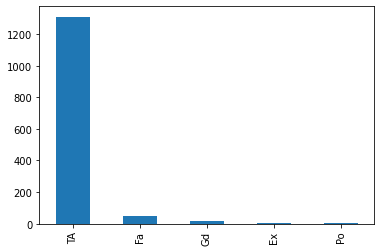

In [121]:
df['GarageQual'].value_counts().plot(kind='bar')

In [122]:
df['GarageQual'].mode()

0    TA
dtype: object

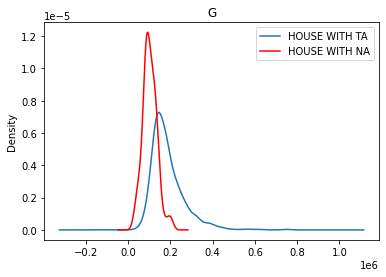

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] =='TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='r')
plt.title('G')
lines, labels=ax.get_legend_handles_labels()
labels=['HOUSE WITH TA', 'HOUSE WITH NA']
ax.legend(lines,labels,loc='best')

In [124]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [125]:
#df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].fillna('missing', inplace=True)


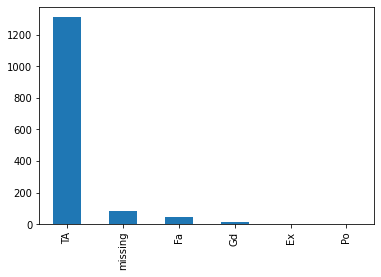

In [126]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

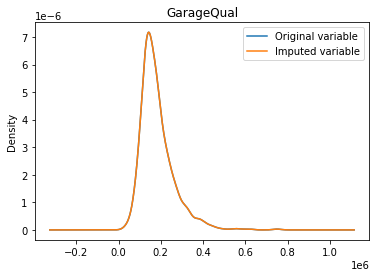

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

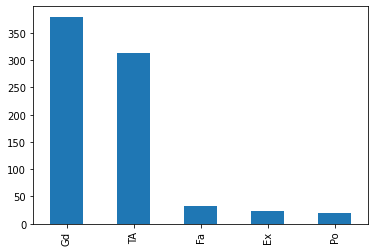

In [82]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [83]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'soyab')

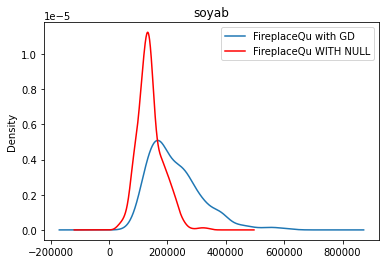

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu'] =='Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='r')
lines ,labels=ax.get_legend_handles_labels()
labels=['FireplaceQu with GD', 'FireplaceQu WITH NULL']
ax.legend(lines, labels )
plt.title('soyab')

In [87]:
temp2=df[df['FireplaceQu'] =='Gd']['SalePrice']

In [93]:
df['FireplaceQu'].fillna('Gd', inplace=True)

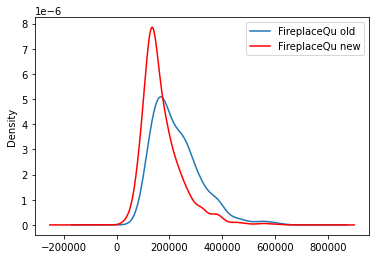

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp2.plot(kind='kde', ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='r')
lines, labels=ax.get_legend_handles_labels()
labels=['FireplaceQu old', 'FireplaceQu new']
ax.legend(lines , labels)

In [96]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [111]:
X_train, X_test, y_train, y_test= train_test_split(df.drop(columns=['SalePrice']), df ['SalePrice'], test_size=0.5)

In [105]:
from sklearn.impute import SimpleImputer

In [114]:
imputer=SimpleImputer(strategy='most_frequent')


In [115]:
X_train = imputer.fit_transform(x_train)
X_test=imputer.transform(X_test)


In [116]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [127]:
x_train, x_test, y_train , y_test= train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.5)

In [128]:
imputer=SimpleImputer(strategy='constant' ,fill_value='missing')

In [129]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


In [130]:
imputer.statistics_

array(['missing', 'missing'], dtype=object)